Name:

KhAleD FoUaD

Specialization & Track:

Data Analysis Professional Nanodegree Program

Cohort: 9

Feb.-Apr. 2021

### Project 2:

## Wrangle and Analyze Data

________________________________________________________________

### *WeRateDogs* Twitter Archive Data

________________________________________________________________

In [1]:
import pandas as pd
import requests
import tweepy
import json
import numpy as np
import datetime
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# to see all of a column's content
pd.set_option('display.max_colwidth', None)

In [3]:
# to see all of columns
pd.set_option('display.max_columns', None)

## step 1 of 5 : Gathering

In [4]:
# 1st source: Udacity server [after twitter WeRateDogs archive surely] - file name: twitter-archive-enhanced
# - 1st format: comma separated values (csv) - download type: manually from class link

# read into a dataframe with an appropriate name using the pandas library
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# view the dataframe
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [6]:
# view a sample tweet
sample_tweet = archive_df.iloc[10]
sample_tweet

tweet_id                                                                                                                                                              890006608113172480
in_reply_to_status_id                                                                                                                                                                NaN
in_reply_to_user_id                                                                                                                                                                  NaN
timestamp                                                                                                                                                      2017-07-26 00:31:25 +0000
source                                                                                                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                          This is Koda. He is a South Australian decksh

In [7]:
# another
sample_tweet = archive_df.iloc[-9]
sample_tweet

tweet_id                                                                                                                                666057090499244032
in_reply_to_status_id                                                                                                                                  NaN
in_reply_to_user_id                                                                                                                                    NaN
timestamp                                                                                                                        2015-11-16 00:55:59 +0000
source                                                                  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                          My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O
retweeted_status_id                                                   

In [8]:
# 2nd source: Udacity server [after twitter WeRateDogs archive surely] and a URL - file name: image-predictions
# - 2nd format: tab separated values (tsv) - download type: programmatically using Requests library and a URL

# Downloading and saving the image prediction data using Requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = 'image-predictions.tsv'
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
file_name = url.split('/')[-1]

with open(file_name, 'wb') as f:
     f.write(response.content)

In [9]:
print(file_name)

image-predictions.tsv


In [10]:
# read into a dataframe
img_pred_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [11]:
# view the dataframe
img_pred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
# a sample
img_pred_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1621,803276597545603072,https://pbs.twimg.com/media/CyXPzXRWgAAvd1j.jpg,1,Pembroke,0.457086,True,chow,0.307801,True,golden_retriever,0.049988,True
1304,753294487569522689,https://pbs.twimg.com/media/CnQ9Vq1WEAEYP01.jpg,1,chow,0.194773,True,monitor,0.102305,False,Siberian_husky,0.086855,True
1725,820078625395449857,https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg,3,school_bus,0.999833,False,cab,0.000160,False,crane,0.000002,False
1509,785927819176054784,https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg,1,teddy,0.972070,False,toy_poodle,0.008493,True,chow,0.002883,True
1499,783821107061198850,https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg,1,Lakeland_terrier,0.265659,True,golden_retriever,0.196414,True,standard_poodle,0.133534,True
2043,885984800019947520,https://pbs.twimg.com/media/DEumeWWV0AA-Z61.jpg,1,Blenheim_spaniel,0.972494,True,Shih-Tzu,0.006630,True,Bernese_mountain_dog,0.006239,True
847,695409464418041856,https://pbs.twimg.com/media/CaaXN5LUYAEzAh-.jpg,1,pug,0.997445,True,bull_mastiff,0.001749,True,Pekinese,0.000304,True
1288,751205363882532864,https://pbs.twimg.com/media/CmzRRY1WcAEoxwY.jpg,2,Labrador_retriever,0.947164,True,Chesapeake_Bay_retriever,0.020597,True,golden_retriever,0.016579,True
2028,882627270321602560,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True
1009,709225125749587968,https://pbs.twimg.com/media/Cdese-zWEAArIqE.jpg,1,Labrador_retriever,0.271109,True,Pomeranian,0.150487,True,golden_retriever,0.145578,True


In [13]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# #These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


In [14]:
ls

 Volume in drive C has no label.
 Volume Serial Number is C63B-0762

 Directory of C:\Users\Khaled\Downloads\project 2 Data Wrangling

14-Apr-2021  07:44 PM    <DIR>          .
14-Apr-2021  07:44 PM    <DIR>          ..
29-Mar-2021  06:09 PM    <DIR>          .ipynb_checkpoints
14-Apr-2021  03:10 PM         1,017,827 act_report.docx
13-Apr-2021  11:29 PM           720,506 act_report.pdf
14-Apr-2021  07:49 PM           335,079 image-predictions.tsv
13-Apr-2021  11:19 PM    <DIR>          side files
23-Mar-2021  02:23 AM        10,609,234 tweet-json.txt
14-Apr-2021  07:48 PM           592,554 twitter_archive_master.csv
23-Mar-2021  02:12 AM             1,764 twitter-api.py
22-Mar-2021  12:40 PM           915,692 twitter-archive-enhanced.csv
14-Apr-2021  07:44 PM           729,987 wrangle_act.ipynb
14-Apr-2021  06:05 PM           189,664 wrangle_report.pdf
               9 File(s)     15,112,307 bytes
               4 Dir(s)  67,100,364,800 bytes free


In [15]:
# 3rd source: Twitter API - file name: tweet_json
# - 3rd format: text (txt) - download type: programmatically using Tweepy library

# Download and read the tweet-json.txt
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']

# read this .txt file line by line into a pandas DataFrame with tweet ID, retweet count, favorite count, and user count
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df = pd.DataFrame(df_list)
api_df.sample(10)

,tweet_id,retweet_count,favorite_count,user_count
348,831650051525054464,2243,7908,3200892
1413,698703483621523456,425,1608,3200950
771,776477788987613185,3249,9858,3200902
116,870063196459192321,8840,37771,3200891
1603,685681090388975616,140,2069,3200950
232,847842811428974592,1522,5935,3200891
1679,681981167097122816,1161,3043,3200952
403,824025158776213504,679,5255,3200894
291,838083903487373313,3582,19183,3200891
1508,691444869282295808,955,2890,3200950


In [16]:
# view the dataframe
api_df

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
...,...,...,...,...
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018


In [17]:
print(type(tweet_id))
print(tweet_id)

<class 'int'>
666020888022790149


In [18]:
# view 1st row
display(api_df.iloc[0])

tweet_id          892420643555336193
retweet_count                   8853
favorite_count                 39467
user_count                   3200889
Name: 0, dtype: int64

In [19]:
# view another but from tail
display(api_df.iloc[2353])

tweet_id          666020888022790149
retweet_count                    532
favorite_count                  2535
user_count                   3201018
Name: 2353, dtype: int64

In [20]:
# view a column
print(api_df['tweet_id'])

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: tweet_id, Length: 2354, dtype: int64


In [21]:
# another
print(api_df['user_count'])

0       3200889
1       3200889
2       3200889
3       3200889
4       3200889
         ...   
2349    3201018
2350    3201018
2351    3201018
2352    3201018
2353    3201018
Name: user_count, Length: 2354, dtype: int64


In [22]:
ls

 Volume in drive C has no label.
 Volume Serial Number is C63B-0762

 Directory of C:\Users\Khaled\Downloads\project 2 Data Wrangling

14-Apr-2021  07:44 PM    <DIR>          .
14-Apr-2021  07:44 PM    <DIR>          ..
29-Mar-2021  06:09 PM    <DIR>          .ipynb_checkpoints
14-Apr-2021  03:10 PM         1,017,827 act_report.docx
13-Apr-2021  11:29 PM           720,506 act_report.pdf
14-Apr-2021  07:49 PM           335,079 image-predictions.tsv
13-Apr-2021  11:19 PM    <DIR>          side files
23-Mar-2021  02:23 AM        10,609,234 tweet-json.txt
14-Apr-2021  07:48 PM           592,554 twitter_archive_master.csv
23-Mar-2021  02:12 AM             1,764 twitter-api.py
22-Mar-2021  12:40 PM           915,692 twitter-archive-enhanced.csv
14-Apr-2021  07:44 PM           729,987 wrangle_act.ipynb
14-Apr-2021  06:05 PM           189,664 wrangle_report.pdf
               9 File(s)     15,112,307 bytes
               4 Dir(s)  67,100,364,800 bytes free


________________________________________________________________

## step 2 of 5 : Assessing

- ***quality*** of data is assessed according to criteria concerning the content: completeness, validity, accuracy and consistency.

- there are some data can be investigated & assessed **visually**.
- other data can only be investigated & assessed **programmatically**.

In [23]:
# info() method can reveal many and various quality and tidi issues

# a visual check
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [24]:
# statistical data
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


- dealing with each column...

In [25]:

archive_df[archive_df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [26]:
# number of tweets with missing urls 'missing data in expanded_urls column'
sum(archive_df.expanded_urls.isna())

59

In [27]:
# number of tweets with missing urls are retweets or replies
sum(archive_df.expanded_urls.isna() & \
    (archive_df.in_reply_to_status_id.notnull() | \
     archive_df.retweeted_status_id.notnull()))

56

In [28]:
# which tweets that are missing urls (confirmed, now showing), and aren't retweets and aren't replies
mask = archive_df.expanded_urls.isna() & \
       archive_df.in_reply_to_status_id.isna() & \
       archive_df.retweeted_status_id.isna()
archive_df[mask][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 would listen,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


In [29]:
# to feel in a right path,
# are these tweets in img. predictions table?
tweet_list = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = img_pred_df.tweet_id.isin(tweet_list)
sum(find_tweet_id)

0

In [30]:
# now here
# are these tweets in api_df table?
tweet_list = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = api_df.tweet_id.isin(tweet_list)
api_df[find_tweet_id]

,tweet_id,retweet_count,favorite_count,user_count
374,828361771580813312,195,2408,3200892
706,785515384317313025,1477,6800,3200901
1443,696518437233913856,1887,4274,3200950


In [31]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

there are those types of devices and sources:

only 4 values in 'source column':

- Twitter for iPhone
- Vine - Make a Scene
- Twitter Web Client
- TweetDeck

In [32]:
archive_df.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [33]:
archive_df.isnull().count()

tweet_id                      2356
in_reply_to_status_id         2356
in_reply_to_user_id           2356
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id           2356
retweeted_status_user_id      2356
retweeted_status_timestamp    2356
expanded_urls                 2356
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [34]:
archive_df.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [35]:
archive_df[archive_df.duplicated()].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [36]:
archive_df.name.value_counts().head(50)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Penny       10
Tucker      10
Lola        10
Bo           9
Winston      9
Sadie        8
the          8
Buddy        7
Daisy        7
Bailey       7
an           7
Toby         7
Jack         6
Jax          6
Stanley      6
Milo         6
Koda         6
Bella        6
Scout        6
Leo          6
Rusty        6
Dave         6
Oscar        6
Chester      5
very         5
Louis        5
Sammy        5
Larry        5
Sunny        5
Bentley      5
Oakley       5
Alfie        5
Finn         5
Phil         5
George       5
Gus          5
Hank         4
Gerald       4
Maximus      4
Dexter       4
Duke         4
Maggie       4
Scooter      4
Shadow       4
Name: name, dtype: int64

In [37]:
list(archive_df.name)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

In [38]:
# check 'name column' where letters 'less' than 3 and begin with lowercased
for index, row in archive_df.iterrows():  
    if len(row['name']) < 3 and row['name'][0].islower():
        print(row['name'])

a
a
an
a
my
a
a
a
an
a
a
a
a
a
a
an
a
a
a
by
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
an
a
a
a
a
a
a
a
a
a
a
a
a
a
an
a
an
a
a
an
a
a
a
a


In [39]:
# check 'name column' where letters 'more' than 3 and begin with lowercased
for index, row in archive_df.iterrows():  
    if len(row['name']) > 3 and row['name'][0].islower():
        print(row['name'])

such
quite
quite
quite
incredibly
very
very
just
very
actually
just
getting
very
this
unacceptable
infuriating
very
getting
just
actually
officially
life
light
just
space
quite


In [40]:
# slice dataframe to see text & name columns samples
archive_df.loc[:,['text', 'name']].sample(20)

,text,name
1761,Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,None
566,RT @dog_rates: Everybody drop what you're doing and look at this dog. 13/10 must be super h*ckin rare https://t.co/I1bJUzUEW5,None
198,This is Einstein. He's having a really good day. Hopes you are too. H*ckin nifty tongue. 13/10 would snug intensely https://t.co/mdaQhhfpv6,Einstein
1659,aahhhhkslaldhwnxmzbbs 12/10 for being da smooshiest https://t.co/UOPdXmUz4H,None
30,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,None
1100,*faints* 12/10 perfection in pupper form https://t.co/t6TxTwTLEK,None
1385,We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frustrating. 11/10 https://t.co/22x9SbCYCU,very
2109,Vibrant dog here. Fabulous tail. Only 2 legs tho. Has wings but can barely fly (lame). Rather elusive. 5/10 okay pup https://t.co/cixC0M3P1e,None
666,This is Duke. He sneaks into the fridge sometimes. It's his safe place. 11/10 would give little jacket if necessary https://t.co/Fd5WFDTMH4,Duke
2233,This is Ron. Ron's currently experiencing a brain freeze. Damn it Ron. 8/10 https://t.co/4ilfcR5SlK,Ron


- so dog names are all capitalized

In [41]:
# dogs which named 'None', seemed from previous,
# and predictable that there aren't dogs names in 'text column'
# so that it typed 'None' in 'name column'
archive_df.loc[:,['text', 'name']][(archive_df['name'] == 'None')].sample(20)

,text,name
434,RT @dog_rates: We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\n\nhttps://t…,None
1075,Here's a doggo that don't need no human. 12/10 independent af (vid by @MichelleLiuCee) https://t.co/vdgtdb6rON,None
1497,PUPDATE: just noticed this dog has some extra legs. Very advanced. Revolutionary af. Upgraded to a 9/10,None
1838,I'm sure you've all seen this pupper. Not prepared at all for the flying disc of terror. 10/10 https://t.co/G0pQiFGM7O,None
566,RT @dog_rates: Everybody drop what you're doing and look at this dog. 13/10 must be super h*ckin rare https://t.co/I1bJUzUEW5,None
2323,Here we have an Austrian Pulitzer. Collectors edition. Levitates (?). 7/10 would garden with https://t.co/NMQq6HIglK,None
1077,This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P,None
1130,"""Challenge accepted""\n10/10 https://t.co/vNjvr5Bl9u",None
996,SWIM AWAY PUPPER SWIM AWAY 13/10 #BarkWeek https://t.co/QGGhZoTcwy,None
1423,"""Dammit hooman quit playin I jus wanna wheat thin"" 11/10 https://t.co/yAASRDPJnQ",None


In [42]:
# how many tweets have non-capitalized words inside it, shown in 'name column'? 
archive_df.name.str.islower().sum()

109

- none of those 109 names are valid

In [43]:
# see how many stages are there
print(archive_df.doggo.value_counts(), '\n') 
print(archive_df.floofer.value_counts(),'\n')
print(archive_df.pupper.value_counts(),'\n')
print(archive_df.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64 

None       2346
floofer      10
Name: floofer, dtype: int64 

None      2099
pupper     257
Name: pupper, dtype: int64 

None     2326
puppo      30
Name: puppo, dtype: int64


In [44]:
# see what floofer category text look like
archive_df[archive_df.floofer == 'floofer'].text
# seems there are a few ways that this type is spelled: 'floofer', 'Floofer', and 'floofiest'
# may be other dog stages similar in variance of spelling

46       Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP
200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
582                                              This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5
774                                         Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744
984                              This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB
1022                                   Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid 

In [45]:
# slice 3 columns to see 
archive_df.loc[:,['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10
...,...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10


In [46]:
# random sight
archive_df.loc[:,['text', 'rating_numerator', 'rating_denominator']].sample(20)

,text,rating_numerator,rating_denominator
1639,This is Kulet. She's very proud of the flower she picked. Loves it dearly. 10/10 now I want a flower https://t.co/myUUwqJIs7,10,10
2080,This is Remington. He's a man dime. 12/10 https://t.co/m3ufSDwHHJ,12,10
88,You'll get your package when that precious man is done appreciating the pups. 13/10 for everyone https://t.co/PFp4MghzBW,13,10
1632,This is Jeph. He's a Western Sagittarius Dookmarriot. Frightened by leaf. Caught him off guard. 10/10 calm down Jeph https://t.co/bicyOV6lju,10,10
2253,Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10 https://t.co/s1z7mX4c9O,8,10
235,This is Cannon. He just heard something behind him. Fr*ckin frightened af. 12/10 don't look back just run https://t.co/WTPBWT6Ux1,12,10
1900,This is Rodman. He's getting destroyed by the surfs. Valiant effort though. 10/10 better than most puppers probably https://t.co/S8wCLemrNb,10,10
1671,This is Kreg. He's riding an invisible jet ski. 11/10 that's downright legendary https://t.co/BA5AV5dx6Y,11,10
665,This is Mosby. He appears to be rather h*ckin snuggable af. 12/10 keep it up Mosby https://t.co/IiiBq460I7,12,10
582,This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,12,10


In [47]:
# now a focus on denominator,
# count of all denominators
archive_df.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [48]:
# number of that aren't 10 [aren't normal]
sum(archive_df.rating_denominator != 10)

23

In [49]:
# display tweets that don't have denominator of 10, and aren't retweets and aren't replies
mask_find = (archive_df.rating_denominator != 10) & \
            archive_df.in_reply_to_status_id.isna() & \
            archive_df.retweeted_status_id.isna()

mask_cols = ['text', 'rating_numerator', 'rating_denominator']
archive_df[mask_find][mask_cols]

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [50]:
# number of previous found rows
sum(mask_find)

17

In [51]:
# now a focus on numerator,
# count of all numerators
archive_df.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [52]:
# number of that bigger than or equal 15 [aren't normal]
sum(archive_df.rating_numerator >= 15)

28

In [53]:
# now from previous resulted count of 28 tweets with numerator >= 15 ;
# filter seeing only those ratings with denominators = 10
df_tweets_denom_10 = archive_df[archive_df.rating_denominator == 10]
df_tweets_denom_10.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [54]:
# after previous, answering how many are there of them?
sum(df_tweets_denom_10.rating_numerator >= 15)
# actually i preferred 15 be the lower border, because it got just 2 counts

12

In [55]:
# display tweets with numerator >= 15 that 'do have' denominator of 10, and aren't retweets and aren't replies
mask_find = (archive_df.rating_denominator == 10) & \
            (archive_df.rating_numerator >= 15) & \
            archive_df.in_reply_to_status_id.isna() & \
            archive_df.retweeted_status_id.isna()

mask_cols = ['text', 'rating_numerator', 'rating_denominator']
archive_df[mask_find][mask_cols]

,text,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10


- therefore, there are 5 tweets (excluding retweets and replies) with numerator >= 15 and denominator = 10
- examining text column we notice ratings with decimals or huge numbers
- since there are so few; these tweets will be ignored and dropped

In [56]:
# display tweets with numerator = 0 that 'do have' denominator of 10, and aren't retweets and aren't replies
mask_find = (archive_df.rating_denominator == 10) & \
            (archive_df.rating_numerator == 0) & \
            archive_df.in_reply_to_status_id.isna() & \
            archive_df.retweeted_status_id.isna()

mask_cols = ['text', 'rating_numerator', 'rating_denominator']
archive_df[mask_find][mask_cols]

,text,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10


In [57]:
img_pred_df.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [58]:
img_pred_df.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/889278779352338437/pu/img/VlbFB3v8H8VwzVNY.jpg,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [59]:
img_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [60]:
img_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [61]:
img_pred_df.isnull()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,False,False,False,False,False,False,False,False,False,False,False,False
2071,False,False,False,False,False,False,False,False,False,False,False,False
2072,False,False,False,False,False,False,False,False,False,False,False,False
2073,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
img_pred_df.isnull().count()

tweet_id    2075
jpg_url     2075
img_num     2075
p1          2075
p1_conf     2075
p1_dog      2075
p2          2075
p2_conf     2075
p2_dog      2075
p3          2075
p3_conf     2075
p3_dog      2075
dtype: int64

In [63]:
img_pred_df.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

In [64]:
img_pred_df[img_pred_df.duplicated()].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [65]:
img_pred_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [66]:
img_pred_df.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [67]:
img_pred_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [68]:
# check first 20 of entries that don't predict dogs
img_pred_df[~img_pred_df.p1_dog & \
               ~img_pred_df.p2_dog & \
               ~img_pred_df.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(20)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


In [69]:
# how many times where 'there is no' valid dog breed
# from any of the three predictions?
sum(~img_pred_df.p1_dog & \
    ~img_pred_df.p2_dog & \
    ~img_pred_df.p3_dog)

324

- **∴** best prediction is the first one (p1_dog)

In [70]:
api_df.head(20)

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


In [71]:
api_df.tail(20)

,tweet_id,retweet_count,favorite_count,user_count
2334,666273097616637952,82,184,3201018
2335,666268910803644416,37,108,3201018
2336,666104133288665088,6871,14765,3201018
2337,666102155909144576,16,81,3201018
2338,666099513787052032,73,164,3201018
2339,666094000022159362,79,169,3201018
2340,666082916733198337,47,121,3201018
2341,666073100786774016,174,335,3201018
2342,666071193221509120,67,154,3201018
2343,666063827256086533,232,496,3201018


In [72]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   user_count      2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [73]:
api_df.describe()

,tweet_id,retweet_count,favorite_count,user_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


## Assessment Summary

### Quality

Passing from top to bottom depending on what has shown by info() method,

(equal to; from left to right depending on order of columns), the normal order for eye comfort:-

Firstly only about retweets and replies,

then passing like:

tweet_id

timestamp

source

text

expanded_urls

rating_numerator

rating_denominator

name

doggo
floofer
pupper
puppo

#### archive_df

1)There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

2)There are 78 replies (in_reply_to_status_id, in_reply_to_user_id).

3)'timestamp column' data type is string (object).

4)There are those types of devices and sources:
  
  only 4 values in 'source column':
  - Twitter for iPhone
  - Vine - Make a Scene
  - Twitter Web Client
  - TweetDeck

5)There are 2297 tweets with 'expanded_urls' (links to images) indicating 59 tweets with missing data,
  56 of these tweets are retweets or replies,
  the remaining 3 tweets haven't got the url within the 'text column'.
  
  They 'aren't' in img. predictions table, despite that, 'they are' in the api table, there were 'no image URL' in the api table.
  
  describe() method revealed 2 quality issues in 'rating_denominator' and 'rating_numerator':

6)The 'max' values exaggerate: 1776, 170 .

7)The 'min' equal 0 in both.

8)Ignoring retweets and replies, there are 17 tweets with 'rating_denominator' 'not' equal 10 .
  4 tweets have the correct rating within the text, and can be manually fixed:
  - 740373189193256964: replace 9/11 with 14/10
  - 716439118184652801: replace 50/50 with 11/10
  - 682962037429899265: replace 7/11 with 10/10
  - 666287406224695296: replace 1/2 with 9/10
  
9) 13 tweets (out of the previous 17) are about multiple dogs/pups, and can be dropped.

10)Regarding only tweets with 'rating_denominator' of 10, there are 12 tweets with 'rating_numerator' >= 15. by ignoring the 7 retweets and replies (these aren't 'original' tweets as in 'Key Points'), we end up with 5 tweets with a 'rating_numerator' >= 15 .

11)There are 28 tweets with 'rating_numerator' >= 15. the max value is 1776, that doesn't make sense.

12)There are 109 tweets with regular words (seem normal) in the 'name column' that 'are not' a valid name; these words are always the 3rd word in the tweet and are 'all lowercased', all valid names start with 'an uppercase letter'.

#### img_pred_df

1)'tweet_id' column should be string not int.

2)There are 2075 image predictions, 281 less than number of tweets in the archive dataframe, so will be classified as 'missing data'.

3)Too many marginal predictions and confidences.

#### api_df

1)'tweet_id' should be string not int.

### Tidiness 

#### archive_df

1)The Key Points mentioned we only interested in 'original tweets', no 'retweets'; this data is in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

2)Reply tweets are also not 'original tweets'; this data is in the columns in_reply_to_status_id, in_reply_to_user_id.

3)The dogtionary explains the various stages of dog: doggo, floofer, pupper, and puppo, they simply can and should be in just one column.

4)Columns with numerical data are lies in the far right of the table, which makes it difficult to read.

#### img_pred_df

1)The table doesn't apply the rules of 'tidy data'.

2)The dog breed prediction with the highest confidence level can be combined with the 'archive table' as the 'api table' contains information that is all about the dog in the tweet.

#### api_df

1)Despite separated to 3 tables, all of the data are related.

2)The api table should be combined with the 'archive table'.

-------------------------------------------------------------------------

## step 3 of 5 : Cleaning

In [74]:
# create copies of the dataframes
archive_df_clean = archive_df.copy()
img_pred_df_clean = img_pred_df.copy()
api_df_clean = api_df.copy()

In [75]:
len_archive_df = archive_df_clean.shape[0]; len_archive_df

2356

In [76]:
len_img_pred_df = img_pred_df_clean.shape[0]; len_img_pred_df

2075

In [77]:
len_api_df = api_df_clean.shape[0]; len_api_df

2354

### Quality *archive_df*
Cleaning no. 1)in assessment summary

#### *Define*
As per material, interested in only original tweets.

Drop all rows containing retweets, where these columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

#### *Code*

In [78]:
print('no. of retweets:  {}'.format(sum(archive_df_clean.retweeted_status_id.notnull())))

no. of retweets:  181


In [79]:
archive_df_clean = archive_df_clean[archive_df_clean.retweeted_status_id.isna()]

#### *Test*

In [80]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [81]:
# confirming rows are dropped; compare with original table length
print('no. of rows dropped:  {}'.format(len_archive_df - archive_df_clean.shape[0]))

# reset the variable for length of the archive
len_archive_df = archive_df_clean.shape[0]

no. of rows dropped:  181


### Quality *archive_df*
Cleaning no. 2)in assessment summary

#### *Define*
As per material; interested in only original tweets.

Drop all rows that are replies; those non-null values in these columns: in_reply_to_status_id and in_reply_to_user_id.

#### *Code*

In [82]:
print('no. of replies:  {}'.format(sum(archive_df_clean.in_reply_to_status_id.notnull())))

no. of replies:  78


In [83]:
archive_df_clean = archive_df_clean[archive_df_clean.in_reply_to_status_id.isna()]

#### *Test*

In [84]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [85]:
# confirming rows are dropped; compare with original table length
print('no. of rows dropped:  {}'.format(len_archive_df - archive_df_clean.shape[0]))

# reset the variable for length of the archive
len_archive_df = archive_df_clean.shape[0]

no. of rows dropped:  78


### Tidiness *archive_df* 
Cleaning no. 1)in assessment summary

#### *Define*
All columns related to 'retweets' will be empty.

Drop all columns related to retweets: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

#### *Code*

In [86]:
archive_df_clean = archive_df_clean.drop(['retweeted_status_id',
                                            'retweeted_status_user_id',
                                              'retweeted_status_timestamp'], axis = 1)

#### *Test*

In [87]:
# Confirming all retweets related columns are gone
list(archive_df_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Tidiness *archive_df* 
Cleaning no. 2)in assessment summary

#### *Define*
All columns related to 'replies' will be empty.

Drop all columns related to replies: in_reply_to_status_id and in_reply_to_user_id.

#### *Code*

In [88]:
archive_df_clean = archive_df_clean.drop(['in_reply_to_status_id',
                                            'in_reply_to_user_id'], axis = 1)

#### *Test*

In [89]:
# Confirming all replies related columns are gone
list(archive_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Quality *archive_df*
Cleaning no. 3)in assessment summary

#### *Define*
The data type is wrong.

Convert 'timestamp' to datetime data type.

#### *Code*

In [90]:
archive_df_clean['timestamp'] = pd.to_datetime(archive_df_clean.timestamp)
archive_df_clean['timestamp'] = archive_df_clean.timestamp.dt.floor('s')

#### *Test*

In [91]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Quality *archive_df*
Cleaning no. 4)in assessment summary

#### *Define*
Simplifying 'source column'.

Extracting the string within it.

#### *Code*

In [92]:
archive_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [93]:
archive_df_clean['source'] = archive_df_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### *Test*

In [94]:
archive_df_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Quality *archive_df*
Cleaning no. 5)in assessment summary

#### *Define*
In 'expanded_urls' there are tweets with missing data.

Drop those.

#### *Code*

In [95]:
archive_df_clean = archive_df_clean[archive_df_clean.expanded_urls.notnull()]

#### *Test*

In [96]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Quality *archive_df*
Cleaning no. 8)in assessment summary

#### *Define*
There are some wrong values extracted for rating.

Fix manually:
- 740373189193256964: replace 9/11 with 14/10

- 716439118184652801: replace 50/50 with 11/10

- 682962037429899265: replace 7/11 with 10/10

- 666287406224695296: replace 1/2 with 9/10

#### *Code*

In [97]:
mask_row = archive_df_clean.tweet_id == 740373189193256964
archive_df_clean.loc[mask_row, 'rating_numerator'] = 14
archive_df_clean.loc[mask_row, 'rating_denominator'] = 10

In [98]:
mask_row = archive_df_clean.tweet_id == 716439118184652801
archive_df_clean.loc[mask_row, 'rating_numerator'] = 11
archive_df_clean.loc[mask_row, 'rating_denominator'] = 10

In [99]:
mask_row = archive_df_clean.tweet_id == 682962037429899265
archive_df_clean.loc[mask_row, 'rating_numerator'] = 10
archive_df_clean.loc[mask_row, 'rating_denominator'] = 10

In [100]:
mask_row = archive_df_clean.tweet_id == 666287406224695296
archive_df_clean.loc[mask_row, 'rating_numerator'] = 9
archive_df_clean.loc[mask_row, 'rating_denominator'] = 10

#### *Test*

In [101]:
mask_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
archive_df_clean[(archive_df_clean.tweet_id == 740373189193256964) | \
              (archive_df_clean.tweet_id == 716439118184652801) | \
              (archive_df_clean.tweet_id == 682962037429899265) | \
              (archive_df_clean.tweet_id == 666287406224695296) ][mask_cols]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10


### Quality *archive_df*
Cleaning no. 9)in assessment summary

#### *Define*
Some tweets with 'rating_denominator' 'not equal' 10, like multiple dogs or no valid rating.

Drop 13 tweets the remaining (out of 17 tweets) with 'rating_denominator' 'not' equal 10 .

#### *Code*

In [102]:
# display all denominators (including normal)
archive_df_clean.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
120       1
110       1
90        1
80        2
70        1
50        2
40        1
20        1
10     2081
7         1
Name: rating_denominator, dtype: int64

In [103]:
archive_df_clean = archive_df_clean[archive_df_clean.rating_denominator == 10]

#### *Test*

In [104]:
# check column values, should be '10' only (normal ones)
archive_df_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2081
Name: rating_denominator, dtype: int64

### Quality *archive_df*
Cleaning no. 10)in assessment summary

#### *Define*
5 tweets with a 'rating_numerator' >= 15, doesn't make sense.

Drop tweets contain rating_numerator >= 15 .

#### *Code*

In [105]:
# display numerators greater than 15
mask = archive_df_clean.rating_numerator >= 15
archive_df_clean[mask].rating_numerator.value_counts().sort_index(ascending = False)

1776    1
420     1
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

In [106]:
archive_df_clean = archive_df_clean[archive_df_clean.rating_numerator < 15]

#### *Test*

In [107]:
# display ALL numerators
archive_df_clean.rating_numerator.value_counts().sort_index(ascending = False)

14     39
13    287
12    485
11    414
10    435
9     153
8      98
7      51
6      32
5      34
4      15
3      19
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

### Quality *archive_df*
Cleaning no. 12)in assessment summary

#### *Define*
Tweets with regular words (seem normal) in 'name column' that 'are not' a valid dog name.

Those lowercased words in 'name column' will be replaced with the string 'none'.

#### *Code*

In [108]:
names_mask = archive_df_clean.name.str.contains('^[a-z]', regex = True)
archive_df_clean[names_mask].name.value_counts().sort_index()

a               54
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
unacceptable     1
very             4
Name: name, dtype: int64

In [109]:
archive_df_clean.loc[names_mask, 'name'] = 'none'

#### *Test*

In [110]:
# all changed to 'none'
archive_df_clean[names_mask].name.value_counts().sort_index()

none    102
Name: name, dtype: int64

### Tidiness *archive_df*
Cleaning no. 3)in assessment summary

***There are actually both quality and tidiness issues***

#### *Define*
Create a temporary none column.

Create a new column stage to store dogs categories.

Turn the stage column to categorical data type.

Drop the 4 original dog stage columns, and the temporary none column.

..so that, the 4 stages will be in one.

#### *Code*

In [111]:
archive_df_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2076,2076,2076,2076
unique,2,2,2,2
top,None,None,None,None
freq,1993,2066,1848,2052


Order the dog stages by count in ascending order: floofer, puppo, doggo and pupper.

In [112]:
make_dummy = lambda x: 0 if x == 'None' else 1

archive_df_clean.doggo = archive_df_clean.doggo.apply(make_dummy)
archive_df_clean.floofer = archive_df_clean.floofer.apply(make_dummy)
archive_df_clean.pupper = archive_df_clean.pupper.apply(make_dummy)
archive_df_clean.puppo = archive_df_clean.puppo.apply(make_dummy)

archive_df_clean['none'] = archive_df_clean['doggo'] + archive_df_clean['floofer'] + \
                        archive_df_clean['pupper'] + archive_df_clean['puppo']

archive_df_clean['none'].value_counts()

0    1742
1     323
2      11
Name: none, dtype: int64

It was predictable to find tweets about multiple dogs.

In [113]:
stage_none = lambda x: 1 if x == 0 else 0

archive_df_clean['none'] = archive_df_clean['none'].apply(stage_none)

stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

conditions = [
    (archive_df_clean[stage[0]] == 1),
    (archive_df_clean[stage[1]] == 1),
    (archive_df_clean[stage[2]] == 1),
    (archive_df_clean[stage[3]] == 1),
    (archive_df_clean[stage[4]] == 1)]

archive_df_clean['stage'] = np.select(conditions, stage, default = stage[4])

archive_df_clean.drop(stage, axis = 1, inplace = True)

archive_df_clean['stage'] = archive_df_clean.stage.astype('category')

#### *Test*

In [114]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   int64              
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2076 non-null   int64              
 6   rating_denominator  2076 non-null   int64              
 7   name                2076 non-null   object             
 8   stage               2076 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 148.2+ KB


In [115]:
archive_df_clean.stage.value_counts()

none       1742
pupper      219
doggo        81
puppo        24
floofer      10
Name: stage, dtype: int64

### Quality *archive_df*

#### *Define*
The data type of 'tweet_id column' is wrong.

Convert 'tweet_id' to string data type.

#### *Code*

In [116]:
archive_df_clean['tweet_id'] = archive_df_clean['tweet_id'].astype('str')

#### *Test*

In [117]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   object             
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2076 non-null   int64              
 6   rating_denominator  2076 non-null   int64              
 7   name                2076 non-null   object             
 8   stage               2076 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 148.2+ KB


### Quality *img_pred_df*
Cleaning no. 1)in assessment summary

#### *Define*
The data type is wrong.

Convert 'tweet_id' to string data type.

#### *Code*

In [118]:
img_pred_df_clean['tweet_id'] = img_pred_df_clean['tweet_id'].astype('str')

#### *Test*

In [119]:
img_pred_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Quality *api_df*
Cleaning no. 1)in assessment summary

#### *Define*
The data type is wrong.

Convert 'tweet_id' to string data type.

#### *Code*

In [120]:
api_df_clean['tweet_id'] = api_df_clean['tweet_id'].astype('str')

#### *Test*

In [121]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   user_count      2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


### Tidiness *img_pred_df* , and
### Tidiness *api_df*


Cleaning no. 1)&2) in both of the dataframes in assessment summary

#### *Define*
Merge the 3 tables.

#### *Code*

In [122]:
archive_df_clean = pd.merge(left=archive_df_clean, right=api_df_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [123]:
archive_df_clean = archive_df_clean.merge(img_pred_df_clean, on='tweet_id', how='inner')

#### *Test*

In [124]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1953 non-null   object             
 1   timestamp           1953 non-null   datetime64[ns, UTC]
 2   source              1953 non-null   object             
 3   text                1953 non-null   object             
 4   expanded_urls       1953 non-null   object             
 5   rating_numerator    1953 non-null   int64              
 6   rating_denominator  1953 non-null   int64              
 7   name                1953 non-null   object             
 8   stage               1953 non-null   category           
 9   retweet_count       1953 non-null   int64              
 10  favorite_count      1953 non-null   int64              
 11  user_count          1953 non-null   int64              
 12  jpg_url             1953 non-null 

In [125]:
archive_df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,user_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,none,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,none,6514,33819,3200889,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,none,4328,25461,3200889,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,none,8964,42908,3200889,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,none,9774,41048,3200889,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,none,41,111,3201018,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1949,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,none,none,147,311,3201018,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1950,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,none,none,47,128,3201018,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1951,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r

#### *Define*
*Additional Quality & Tidi cleaning*.

Related to the previous point (action of merging was a tidi one already) and its test (info & df).

Columns that will not be of use in analysis (quality consistency).

Change in structure is another tidi cleaning here (similar to what happened to various dog stages previously).

Content of 'expanded_urls column' not needed anymore, and p1 & its brothers are the strongest breed predictions and confidences.

Drop the columns 'expanded_urls', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' .

#### *Code*

In [126]:
archive_df_clean = archive_df_clean.drop(['expanded_urls',
                                          'p2',
                                            'p2_conf',
                                              'p2_dog',
                                                 'p3',
                                                    'p3_conf',
                                                       'p3_dog'], axis = 1)

#### *Test*

In [127]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1953 non-null   object             
 1   timestamp           1953 non-null   datetime64[ns, UTC]
 2   source              1953 non-null   object             
 3   text                1953 non-null   object             
 4   rating_numerator    1953 non-null   int64              
 5   rating_denominator  1953 non-null   int64              
 6   name                1953 non-null   object             
 7   stage               1953 non-null   category           
 8   retweet_count       1953 non-null   int64              
 9   favorite_count      1953 non-null   int64              
 10  user_count          1953 non-null   int64              
 11  jpg_url             1953 non-null   object             
 12  img_num             1953 non-null 

In [128]:
archive_df_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,user_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,none,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,none,6514,33819,3200889,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,none,4328,25461,3200889,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,none,8964,42908,3200889,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,none,9774,41048,3200889,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,None,none,41,111,3201018,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True
1949,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,none,none,147,311,3201018,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
1950,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,none,none,47,128,3201018,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
1951,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,none,none,48,132,3201018,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True


## step 4 of 5 : Storing

In [129]:
archive_df_clean.to_csv('twitter_archive_master.csv', index = False)

In [130]:
ls *csv

 Volume in drive C has no label.
 Volume Serial Number is C63B-0762

 Directory of C:\Users\Khaled\Downloads\project 2 Data Wrangling

14-Apr-2021  07:49 PM           592,554 twitter_archive_master.csv
22-Mar-2021  12:40 PM           915,692 twitter-archive-enhanced.csv
               2 File(s)      1,508,246 bytes
               0 Dir(s)  67,100,299,264 bytes free


## step 5 of 5 : Analyze, Visualize & Report

In [131]:
# a copy of archive master table for analysis
weratedogs_analysis = archive_df_clean.copy()

In [132]:
weratedogs_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1953 non-null   object             
 1   timestamp           1953 non-null   datetime64[ns, UTC]
 2   source              1953 non-null   object             
 3   text                1953 non-null   object             
 4   rating_numerator    1953 non-null   int64              
 5   rating_denominator  1953 non-null   int64              
 6   name                1953 non-null   object             
 7   stage               1953 non-null   category           
 8   retweet_count       1953 non-null   int64              
 9   favorite_count      1953 non-null   int64              
 10  user_count          1953 non-null   int64              
 11  jpg_url             1953 non-null   object             
 12  img_num             1953 non-null 

In [133]:
weratedogs_analysis[['rating_numerator', 'retweet_count', 'favorite_count', 'p1_conf']].describe()

,rating_numerator,retweet_count,favorite_count,p1_conf
count,1953.000000,1953.000000,1953.000000,1953.000000
mean,10.539171,2791.375832,8979.281618,0.594296
std,2.174184,4716.280931,12312.853089,0.272253
min,0.000000,16.000000,81.000000,0.044333
25%,10.000000,623.000000,1957.000000,0.362596
50%,11.000000,1360.000000,4144.000000,0.587764
75%,12.000000,3244.000000,11452.000000,0.846986
max,14.000000,79515.000000,132810.000000,1.000000


In [134]:
# tweets time range
weratedogs_analysis.timestamp.min(), weratedogs_analysis.timestamp.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

In [135]:
# set default display parameter
plt.rcParams['figure.figsize'] = (8, 6)

.......................................................................

We can ask ourselves few questions...

and use its answers in insights to be produced too...

and extract from visuals few insights as well.

.......................................................................

***what are the top 5 favourited tweets?***

In [136]:
weratedogs_analysis.sort_values(by = 'favorite_count', ascending = False).head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,user_count,jpg_url,img_num,p1,p1_conf,p1_dog
306,822872901745569793,2017-01-21 18:26:02+00:00,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13,10,None,puppo,48265,132810,3200894,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True
763,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13,10,None,doggo,79515,131075,3200943,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Labrador_retriever,0.825333,True
58,879415818425184262,2017-06-26 19:07:24+00:00,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,13,10,Duddles,none,45849,107956,3200891,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,1,English_springer,0.383404,True
395,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13,10,Stephan,none,56625,107015,3200896,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.505370,True
108,866450705531457537,2017-05-22 00:28:40+00:00,Twitter for iPhone,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",13,10,Jamesy,pupper,32883,106827,3200891,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True


.......................................................................

***Which dog breed prediction have the highest overall favourite counts?***

In [137]:
fav_counts_breed = weratedogs_analysis[weratedogs_analysis.p1 != 'none']
fav_counts_breed = fav_counts_breed.groupby(['p1'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top10_breeds_fav_counts = fav_counts_breed.head(10)

In [138]:
top10_breeds_fav_counts

p1
golden_retriever      1684486
Labrador_retriever    1104820
Pembroke               994755
Chihuahua              673526
Samoyed                542991
French_bulldog         465738
chow                   404241
pug                    320223
cocker_spaniel         315825
Pomeranian             278818
Name: favorite_count, dtype: int64

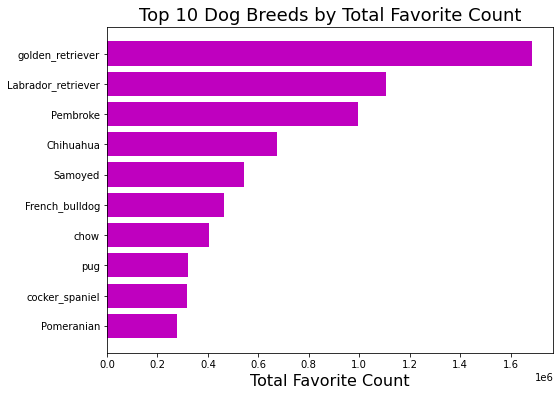

In [139]:
plt.barh(top10_breeds_fav_counts.index, top10_breeds_fav_counts, color = 'm')

plt.xlabel('Total Favorite Count', fontsize = 16)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Total Favorite Count', fontsize = 18)
plt.gca().invert_yaxis()
plt.show();

...So, the bar plot shows the most favorited 10 breeds of dogs ranked by total favorite count.

Apparently people consider 'golden_retriever, Labrador_retriever and Pembroke

.......................................................................

All-Days analysis (to extract pattern or patterns of this archive's actions and\or reactions) ;

***on which base are ratings (inside tweets) distributed by day?***

In [140]:
def jitter(x):
    random.seed()
    return x + random.uniform(0, 0.7)

In [141]:
# return number of days
def days_from_start(x):
    return x.days

# start date
first_day = weratedogs_analysis.timestamp.min()

# array with days corresponding to timestamp
weratedogs_days = (weratedogs_analysis.timestamp - first_day).apply(days_from_start)



***Relation between favorite count and dog rating.***

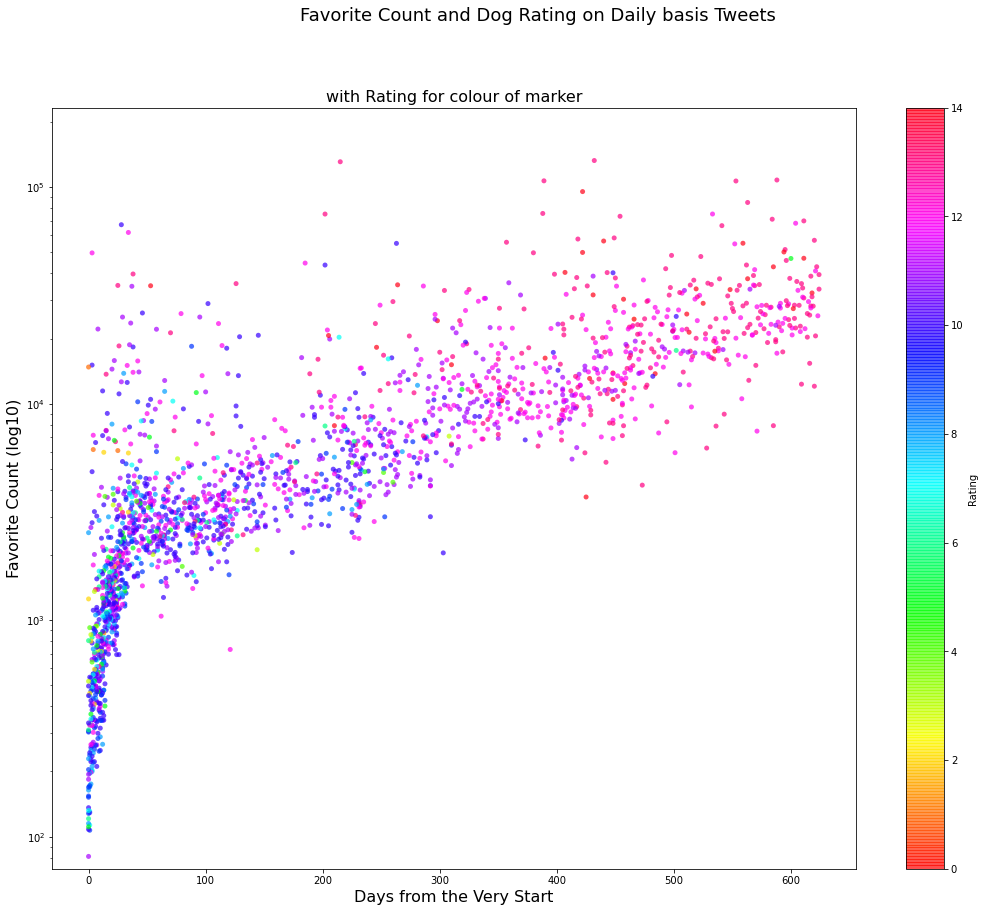

In [142]:
cmap = cm.get_cmap('hsv')
plt.figure(figsize = (18, 14))

# plot styling
plt.yscale('log')
plt.ylim(weratedogs_analysis['favorite_count'].min() - 10, 
         weratedogs_analysis['favorite_count'].max() + 100000)
colours = weratedogs_analysis['rating_numerator']
markers = 25

plt.scatter(weratedogs_days, weratedogs_analysis['favorite_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.7)

# The title,
# labels on all sides
plt.suptitle('Favorite Count and Dog Rating on Daily basis Tweets', fontsize = 18)
plt.title('with Rating for colour of marker', fontsize = 16)
plt.xlabel('Days from the Very Start', fontsize = 16)
plt.ylabel('Favorite Count (log10)', fontsize = 16)

cbar = plt.colorbar()
cbar.set_label('Rating')
plt.show();

.......................................................................

***How many tweets with rating of 10 & up? and what's their Percentage?***

In [143]:
rating10uptotal = sum(weratedogs_analysis.rating_numerator >= 10)
rating10upperc = round(rating10uptotal * 100 / weratedogs_analysis.shape[0])
print('Number of tweets with rating 10+:  {}'.format(rating10uptotal))
print('Percentage of tweets:              {}%'.format(round(rating10upperc, 3)))

Number of tweets with rating 10+:  1544
Percentage of tweets:              79%


.......................................................................

***Therefore, in general there are insights represented observations and somehow conclusions too at the same time, at least I thought of that like it was.***